# FASHION CLASS CLASSIFICATION 

# PROBLEM STATEMENT AND BUSINESS CASE

 Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


## ==================== Import library ======================

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np
from numpy import random, random_intel 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sn
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,classification_report
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape,test_df.shape

((60000, 785), (10000, 785))

In [6]:
def data_preparation_for_model(train_df,test_df):
    # Create training and testing arrays
    training = np.array(train_df, dtype = 'float32')
    testing = np.array(test_df, dtype='float32')
    print("=========================== view some image ====================")
    i = random.randint(1,60000) # select any random index from 1 to 60,000
    plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image
    plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
    label = training[i,0]
    # Define the dimensions of the plot grid 
    W_grid = 15
    L_grid = 15
    fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
    axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
    n_training = len(training) # get the length of the training dataset
    # Select a random number from 0 to n_training
    for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

        # Select a random number
        index = np.random.randint(0, n_training)
        # read and display an image with the selected index    
        axes[i].imshow( training[index,1:].reshape((28,28)) )
        axes[i].set_title(training[index,0], fontsize = 8)
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.4)
    
    # Prepare the training and testing dataset 
    X_train = training[:,1:]/255
    y_train = training[:,0]
    X_test = testing[:,1:]/255
    y_test = testing[:,0]
    
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12)
    
    return X_train, X_validate, y_train, y_validate,X_test,y_test

=========================== view some image ====================


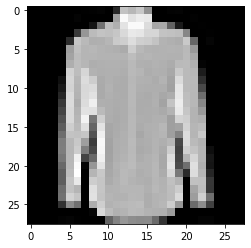

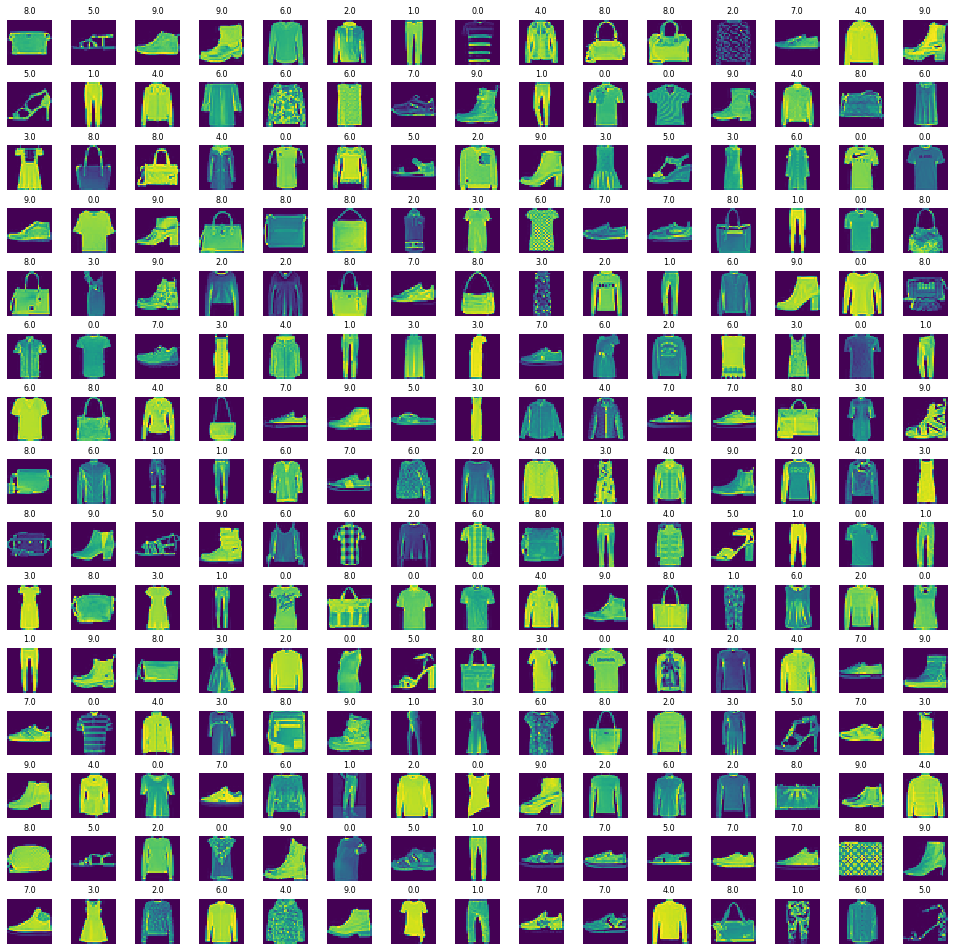

In [7]:
X_train, X_validate, y_train, y_validate,X_test,y_test = data_preparation_for_model(train_df,test_df)

In [12]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print("=========================== final shape of data ==========================") 
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("X_validate",X_validate.shape)

cnn_model = Sequential()

cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

epochs = 50

=========================== final shape of data ==========================
X_train: (48000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
X_validate (12000, 28, 28, 1)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [13]:
history = cnn_model.fit(X_train, y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 60s 1ms/step - loss: 1.0299 - accuracy: 0.5631 - val_loss: 0.5507 - val_accuracy: 0.8026
Epoch 2/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.4710 - accuracy: 0.8338 - val_loss: 0.4787 - val_accuracy: 0.8236
Epoch 3/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.4145 - accuracy: 0.8559 - val_loss: 0.4010 - val_accuracy: 0.8577
Epoch 4/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3725 - accuracy: 0.8712 - val_loss: 0.3717 - val_accuracy: 0.8672
Epoch 5/50
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3460 - accuracy: 0.8798 - val_loss: 0.3436 - val_accuracy: 0.8798
Epoch 6/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3280 - accuracy: 0.8857 - val_loss: 0.3382 - val_accuracy: 0.8800
Epoch 7/50
48000/48000 [==============================] - 56s 1ms/st

==================================Evaluting the Model=======================================
10000/10000 [==============================] - 4s 412us/step


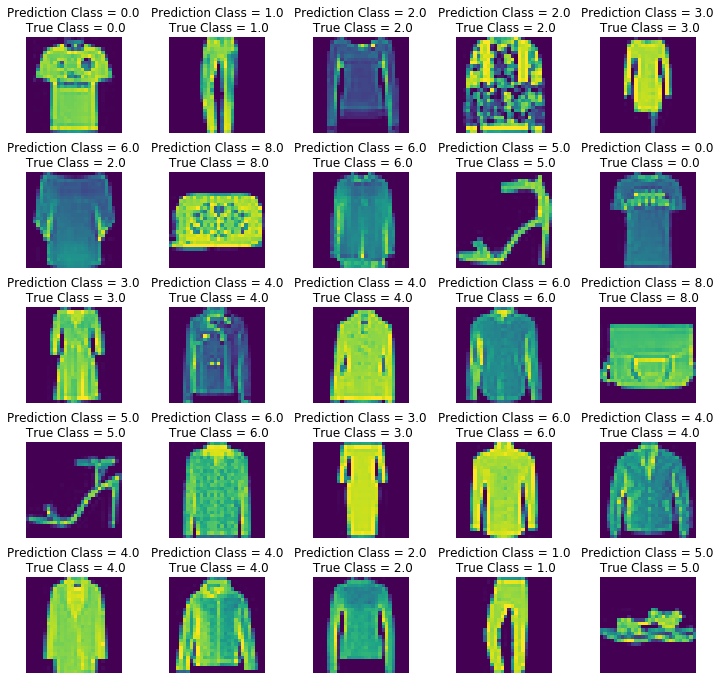

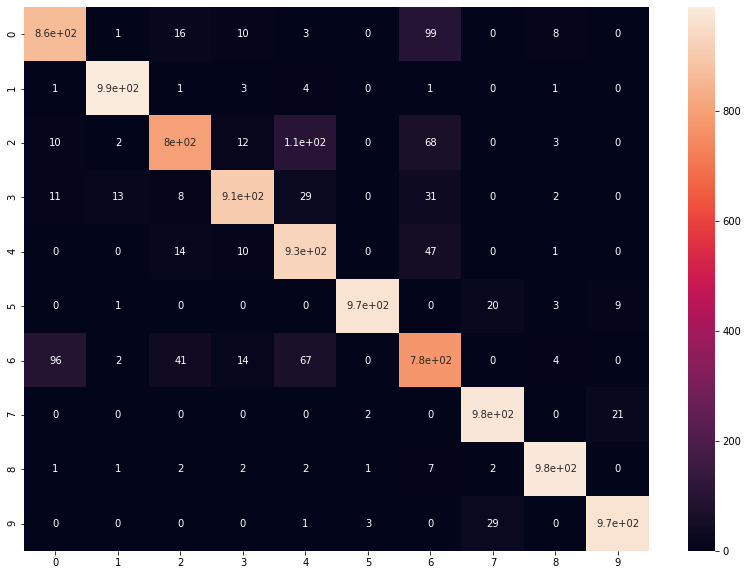

Test Accuracy : 0.915
              precision    recall  f1-score   support

     Class 0       0.88      0.86      0.87      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.91      0.80      0.85      1000
     Class 3       0.95      0.91      0.93      1000
     Class 4       0.81      0.93      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.75      0.78      0.76      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [16]:
print("==================================Evaluting the Model=======================================")
evaluation = cnn_model.evaluate(X_test, y_test)


predicted_classes = cnn_model.predict_classes(X_test)
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sn.heatmap(cm, annot=True)
plt.show()

print('Test Accuracy : {:.3f}'.format(evaluation[1]))                               
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))
